In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/jorgefernandez/Downloads'

In [3]:
Archivo=[s for s in os.listdir() if any(xs in s for xs in ['hmeq'])]
Archivo

['hmeq.csv']

In [4]:
Base=pd.read_csv(Archivo[0])
Base

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [5]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
print(Base['BAD'].shape)
print(Base['BAD'].unique().shape)

(5960,)
(2,)


In [7]:
Base['LOAN'].describe()

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

In [8]:
Q1 = Base['LOAN'].describe()['25%']
Q3 = Base['LOAN'].describe()['75%']
IQR = Q3 - Q1

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango Intercuartílico (IQR):", IQR)

Q3+1.5*IQR,Q3-1.5*IQR

Primer cuartil (Q1): 11100.0
Tercer cuartil (Q3): 23300.0
Rango Intercuartílico (IQR): 12200.0


In [9]:
Q3+1.5*IQR,Q3-1.5*IQR

(41600.0, 5000.0)

In [10]:
Base[Base['LOAN']<5000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,4900,NaN,28437.5,HomeImp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,0,4900,170986.0,245300.0,DebtCon,Sales,NaN,0.0,0.0,131.933333,0.0,22.0,NaN
141,1,4900,65576.0,65774.0,HomeImp,Other,6.0,1.0,2.0,61.642506,1.0,14.0,40.590910
142,0,4900,57461.0,68494.0,DebtCon,ProfExe,8.0,0.0,4.0,183.635613,0.0,30.0,22.795424


In [11]:
Base[Base['LOAN']>41600]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5704,0,41700,59889.0,109250.0,DebtCon,Mgr,16.0,0.0,0.0,187.132811,0.0,22.0,36.968814
5705,0,41700,12375.0,71029.0,HomeImp,Office,NaN,0.0,0.0,325.284193,0.0,19.0,16.101434
5706,1,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645
5707,1,41700,NaN,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779
5708,1,41800,147416.0,227168.0,DebtCon,Self,2.0,0.0,4.0,157.668236,3.0,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


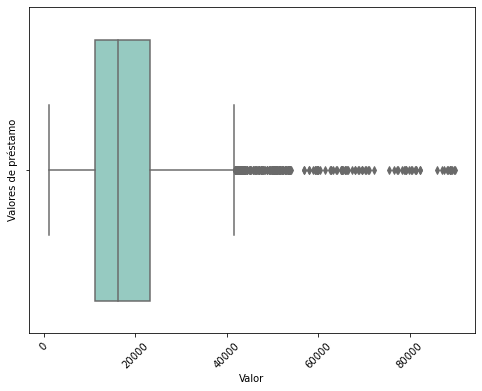

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=Base['LOAN'], palette='Set3')

plt.xlabel('Valor')
plt.ylabel('Valores de préstamo')

plt.xticks(rotation=45)
plt.savefig('boxplot_LOAN.png', bbox_inches='tight')
plt.show()

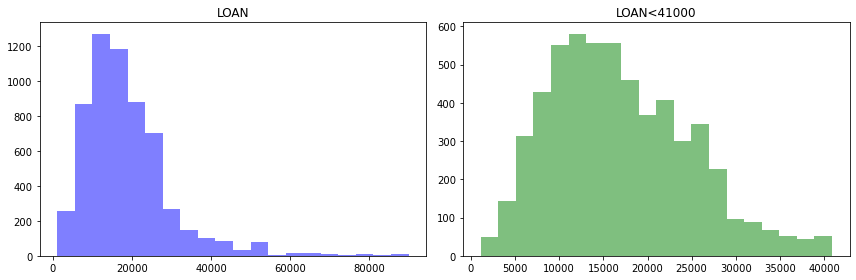

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(Base['LOAN'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('LOAN')
axes[1].hist(Base[Base['LOAN']<41000]['LOAN'], bins=20, color='green', alpha=0.5)
axes[1].set_title('LOAN<41000')
plt.tight_layout()
plt.savefig('Distribucion_Corregida_Loan.png', bbox_inches='tight')

plt.show()

In [14]:
Base[Base['LOAN']>41000].shape[0]*100/Base.shape[0]

4.530201342281879

In [15]:
Imputar_Loan=Base[Base['LOAN']<41000]['LOAN'].mean()
Base['LOAN'] =  np.where(Base['LOAN']>41000,Imputar_Loan,Base['LOAN'])

In [16]:
Base['MORTDUE'].describe()

count      5442.000000
mean      73760.817200
std       44457.609458
min        2063.000000
25%       46276.000000
50%       65019.000000
75%       91488.000000
max      399550.000000
Name: MORTDUE, dtype: float64

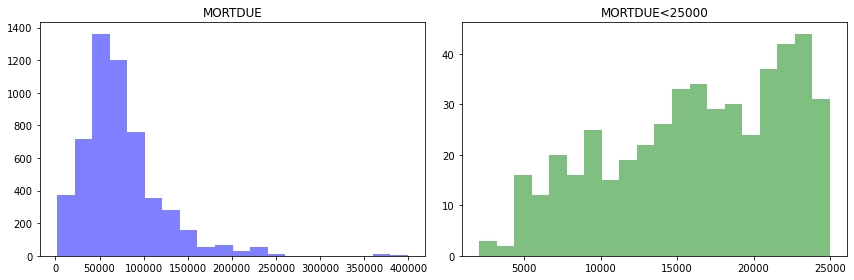

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4)) 
axes[0].hist(Base['MORTDUE'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('MORTDUE')
axes[1].hist(Base[Base['MORTDUE']<25000]['MORTDUE'], bins=20, color='green', alpha=0.5)
axes[1].set_title('MORTDUE<25000')
plt.tight_layout()
plt.show()

In [18]:
Base[Base['MORTDUE'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2000.000000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN
24,1,2400.000000,NaN,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
40,1,3000.000000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
41,1,3000.000000,NaN,33000.0,HomeImp,Other,1.0,0.0,1.0,23.300000,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,16935.114236,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940
5883,0,16935.114236,NaN,81322.0,HomeImp,Self,9.0,0.0,0.0,171.447555,0.0,22.0,24.709060
5884,0,16935.114236,NaN,91309.0,HomeImp,Other,NaN,0.0,0.0,349.795748,0.0,6.0,22.061330
5930,1,16935.114236,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN


In [19]:
Base[Base['MORTDUE']<25000]['MORTDUE'].describe()

count      480.000000
mean     16262.771937
std       5804.815953
min       2063.000000
25%      11977.000000
50%      16802.000000
75%      21406.750000
max      24984.000000
Name: MORTDUE, dtype: float64

In [20]:
Imputar_MortDue=Base[Base['MORTDUE']<25000]['MORTDUE'].mean()
Base['MORTDUE'] =  np.where(Base['MORTDUE']>25000,Imputar_MortDue,Base['MORTDUE'])

In [21]:
Base['MORTDUE'] = np.where(Base['MORTDUE'].isnull(), Imputar_MortDue, Base['MORTDUE'])

In [22]:
Base[Base['VALUE'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000.000000,22608.000000,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200.000000,23030.000000,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400.000000,18000.000000,NaN,HomeImp,Mgr,22.0,NaN,2.0,121.733333,0.0,10.0,NaN
57,1,3200.000000,23159.000000,NaN,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,16935.114236,16262.771937,NaN,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,16935.114236,16262.771937,NaN,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,16935.114236,16262.771937,NaN,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,16935.114236,16262.771937,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


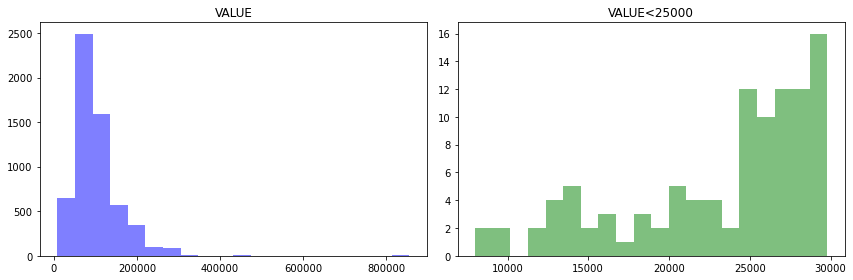

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4)) 
axes[0].hist(Base['VALUE'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('VALUE')
axes[1].hist(Base[Base['VALUE']<30000]['VALUE'], bins=20, color='green', alpha=0.5)
axes[1].set_title('VALUE<25000')
plt.tight_layout()
plt.show()

In [24]:
Base[Base['VALUE']<30000]['VALUE'].describe()

count      103.000000
mean     23180.383495
std       5975.459634
min       8000.000000
25%      19666.000000
50%      25300.000000
75%      27780.000000
max      29800.000000
Name: VALUE, dtype: float64

In [25]:
Imputar_Value=Base[Base['VALUE']<30000]['VALUE'].max()
print(Imputar_Value)
Base['VALUE'] =  np.where(Base['VALUE']>30000,Imputar_Value,Base['VALUE'])
Base['VALUE'] = np.where(Base['VALUE'].isnull(), 25000, Base['VALUE'])

29800.0


In [26]:
Base[Base['REASON'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000.000000,22608.000000,25000.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,2000.000000,16262.771937,29800.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN
17,1,2200.000000,23030.000000,25000.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
51,0,3100.000000,16262.771937,29800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,1,32000.000000,16262.771937,29800.0,NaN,Self,2.5,1.0,3.0,165.333333,1.0,40.0,NaN
5468,1,32900.000000,16262.771937,29800.0,NaN,NaN,1.0,1.0,3.0,210.012265,10.0,15.0,1.909225
5803,1,16935.114236,16262.771937,25000.0,NaN,Other,0.0,0.0,4.0,160.333333,2.0,25.0,NaN
5826,1,16935.114236,16262.771937,25000.0,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


<AxesSubplot:>

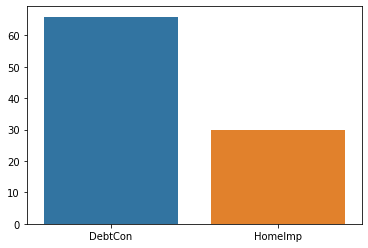

In [27]:
percentages = (Base['REASON'].value_counts() / len(Base)) * 100
sns.barplot(x=percentages.index, y=percentages.values)

In [28]:
Base['REASON'] = np.where(Base['REASON'].isnull(), 'DebtCon', Base['REASON'])

In [29]:
Base[Base['JOB'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,DebtCon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000.000000,22608.000000,25000.0,DebtCon,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200.000000,23030.000000,25000.0,DebtCon,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
27,1,2500.000000,15000.000000,20200.0,HomeImp,NaN,18.0,0.0,0.0,136.066667,1.0,19.0,NaN
51,0,3100.000000,16262.771937,29800.0,DebtCon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,0,16935.114236,18834.000000,29800.0,HomeImp,NaN,28.0,0.0,0.0,139.136329,0.0,14.0,34.042153
5944,0,16935.114236,22344.000000,29800.0,HomeImp,NaN,25.0,0.0,0.0,148.114994,0.0,14.0,34.285741
5945,0,16935.114236,21041.000000,29800.0,HomeImp,NaN,26.0,0.0,0.0,146.322783,0.0,14.0,32.131373
5946,0,16935.114236,16097.000000,29800.0,HomeImp,NaN,26.0,0.0,0.0,142.119979,0.0,14.0,31.743472


<AxesSubplot:>

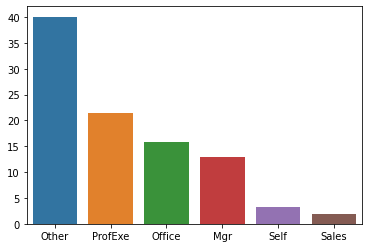

In [30]:
percentages = (Base['JOB'].value_counts() / len(Base)) * 100
sns.barplot(x=percentages.index, y=percentages.values)

In [31]:
Base['JOB'] = np.where(Base['JOB'].isnull(), 'Other', Base['JOB'])

In [32]:
Base[Base['YOJ'].isna()].shape[0]/Base.shape[0]

0.08640939597315436

In [33]:
Base[Base['YOJ'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1,2200.000000,24280.000000,29800.0,HomeImp,Other,NaN,0.0,1.0,300.866667,0.0,8.0,NaN
24,1,2400.000000,16262.771937,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
29,0,2500.000000,7229.000000,29800.0,HomeImp,Self,NaN,0.0,0.0,208.000000,0.0,12.0,NaN
51,0,3100.000000,16262.771937,29800.0,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0,16935.114236,16262.771937,29800.0,HomeImp,Other,NaN,0.0,0.0,347.802514,0.0,7.0,25.324002
5862,0,16935.114236,16262.771937,29800.0,HomeImp,Other,NaN,0.0,0.0,341.828812,0.0,7.0,24.016671
5865,0,16935.114236,16262.771937,29800.0,HomeImp,Other,NaN,1.0,0.0,350.920996,0.0,7.0,24.355304
5880,0,16935.114236,16262.771937,29800.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940


In [34]:
Base[Base['YOJ'].isna()].groupby('JOB').count()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
JOB,,,,,,,,,,,,
Mgr,34,34,34,34,34,0,23,23,23,21,23,30
Office,35,35,35,35,35,0,35,35,35,35,35,32
Other,408,408,408,408,408,0,242,226,285,229,302,335
ProfExe,18,18,18,18,18,0,18,17,18,18,18,16
Sales,10,10,10,10,10,0,10,10,10,10,10,9
Self,10,10,10,10,10,0,10,10,10,10,10,7


In [35]:
Base.groupby('JOB')['YOJ'].mean()

JOB
Mgr        9.319372
Office     8.350438
Other      9.362174
ProfExe    8.752345
Sales      6.802020
Self       7.069399
Name: YOJ, dtype: float64

In [36]:
media_yoj_por_job = Base.groupby('JOB')['YOJ'].mean()
Base['YOJ'].fillna(Base['JOB'].map(media_yoj_por_job), inplace=True)

In [37]:
Base[Base['DEROG'].isna()] ##Duda si la imputo o la ignoramos

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,9.362174,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000.000000,22608.000000,25000.0,DebtCon,Other,18.000000,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200.000000,23030.000000,25000.0,DebtCon,Other,19.000000,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400.000000,18000.000000,25000.0,HomeImp,Mgr,22.000000,NaN,2.0,121.733333,0.0,10.0,NaN
48,0,3000.000000,16262.771937,29800.0,HomeImp,Mgr,10.000000,NaN,2.0,211.933333,0.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,0,16935.114236,16262.771937,29800.0,DebtCon,Other,14.000000,NaN,1.0,235.352057,3.0,30.0,43.181424
5763,0,16935.114236,16262.771937,29800.0,DebtCon,Other,14.000000,NaN,0.0,253.914111,3.0,30.0,43.902152
5766,0,16935.114236,16262.771937,29800.0,DebtCon,Other,16.000000,NaN,1.0,216.101046,4.0,31.0,40.483515
5820,1,16935.114236,16262.771937,29800.0,DebtCon,Other,12.000000,NaN,1.0,178.766599,0.0,35.0,NaN


In [38]:
print(Base[Base['DELINQ'].isna()].shape[0]/Base.shape[0])
Base[Base['DELINQ'].isna()]

0.09731543624161074


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,9.362174,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000.000000,22608.000000,25000.0,DebtCon,Other,18.000000,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200.000000,23030.000000,25000.0,DebtCon,Other,19.000000,NaN,NaN,NaN,NaN,NaN,3.711312
51,0,3100.000000,16262.771937,29800.0,DebtCon,Other,9.362174,NaN,NaN,NaN,NaN,NaN,NaN
63,1,3600.000000,16262.771937,29800.0,HomeImp,ProfExe,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,0,16935.114236,16262.771937,29800.0,DebtCon,Office,5.000000,1.0,NaN,181.390336,1.0,15.0,30.909713
5848,0,16935.114236,16262.771937,29800.0,DebtCon,Office,5.000000,0.0,NaN,178.888671,0.0,16.0,30.841045
5853,0,16935.114236,16262.771937,29800.0,DebtCon,Office,6.000000,0.0,NaN,205.656576,1.0,16.0,31.029003
5855,0,16935.114236,16262.771937,29800.0,DebtCon,Office,6.000000,1.0,NaN,182.520896,1.0,15.0,32.823121


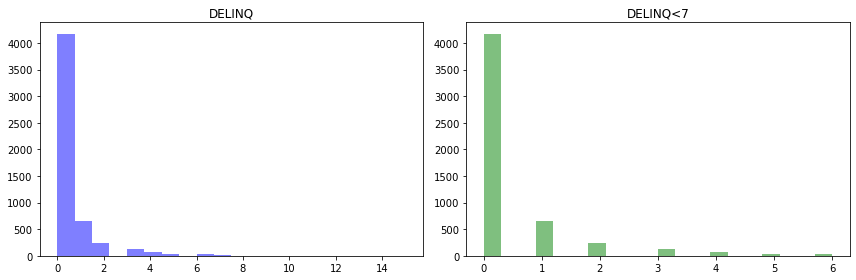

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4)) 
axes[0].hist(Base['DELINQ'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('DELINQ')
axes[1].hist(Base[Base['DELINQ']<7]['DELINQ'], bins=20, color='green', alpha=0.5)
axes[1].set_title('DELINQ<7')
plt.tight_layout()
plt.show()

In [40]:
Base['DELINQ'] = np.where(Base['DELINQ'].isnull(), 0, Base['DELINQ'])

In [41]:
print(Base[Base['CLAGE'].isna()].shape[0]/Base.shape[0])
Base[Base['CLAGE'].isna()]

0.05167785234899329


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,9.362174,NaN,0.0,NaN,NaN,NaN,NaN
10,1,2000.000000,22608.000000,25000.0,DebtCon,Other,18.000000,NaN,0.0,NaN,NaN,NaN,NaN
17,1,2200.000000,23030.000000,25000.0,DebtCon,Other,19.000000,NaN,0.0,NaN,NaN,NaN,3.711312
21,1,2400.000000,16262.771937,29800.0,HomeImp,ProfExe,5.000000,1.0,0.0,NaN,1.0,0.0,NaN
51,0,3100.000000,16262.771937,29800.0,DebtCon,Other,9.362174,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,0,37800.000000,16262.771937,29800.0,DebtCon,Other,9.362174,0.0,0.0,NaN,7.0,0.0,34.226190
5635,0,38900.000000,16262.771937,29800.0,DebtCon,Other,9.362174,0.0,0.0,NaN,6.0,0.0,33.459246
5637,0,39000.000000,16262.771937,29800.0,DebtCon,Other,9.362174,0.0,0.0,NaN,7.0,0.0,31.244399
5784,1,16935.114236,16262.771937,29800.0,DebtCon,Office,3.000000,0.0,0.0,NaN,0.0,0.0,NaN


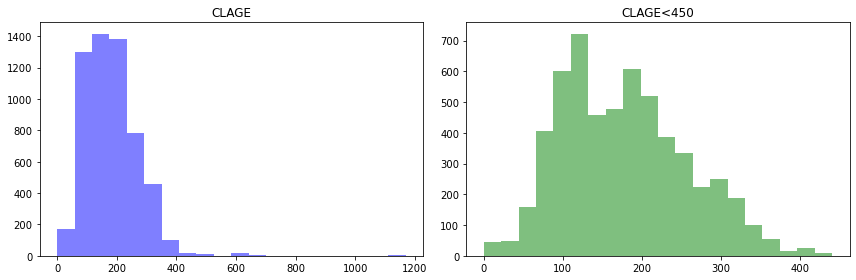

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4)) 
axes[0].hist(Base['CLAGE'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('CLAGE')
axes[1].hist(Base[Base['CLAGE']<450]['CLAGE'], bins=20, color='green', alpha=0.5)
axes[1].set_title('CLAGE<450')
plt.tight_layout()
plt.show()

In [43]:
Base[Base['CLAGE']<450]['CLAGE'].describe()

count    5623.000000
mean      177.502074
std        79.142034
min         0.000000
25%       114.906479
50%       172.767888
75%       230.254451
max       440.421254
Name: CLAGE, dtype: float64

In [44]:
Imputar_CLAGE=Base[Base['CLAGE']<450]['CLAGE'].mean()
print(Imputar_Value)
Base['CLAGE'] =  np.where(Base['CLAGE']>450,Imputar_CLAGE,Base['CLAGE'])
Base['CLAGE'] = np.where(Base['CLAGE'].isnull(), 150, Base['CLAGE'])

29800.0


In [45]:
print(Base[Base['NINQ'].isna()].shape[0]/Base.shape[0])
Base[Base['NINQ'].isna()]

0.08557046979865772


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,9.362174,NaN,0.0,150.000000,NaN,NaN,NaN
10,1,2000.000000,22608.000000,25000.0,DebtCon,Other,18.000000,NaN,0.0,150.000000,NaN,NaN,NaN
17,1,2200.000000,23030.000000,25000.0,DebtCon,Other,19.000000,NaN,0.0,150.000000,NaN,NaN,3.711312
51,0,3100.000000,16262.771937,29800.0,DebtCon,Other,9.362174,NaN,0.0,150.000000,NaN,NaN,NaN
63,1,3600.000000,16262.771937,29800.0,HomeImp,ProfExe,10.000000,NaN,0.0,150.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,0,16935.114236,16262.771937,29800.0,DebtCon,Other,9.362174,5.0,0.0,116.437035,NaN,19.0,26.070435
5762,0,16935.114236,16262.771937,29800.0,DebtCon,Other,9.362174,5.0,0.0,130.496983,NaN,19.0,27.105116
5765,0,16935.114236,16262.771937,29800.0,DebtCon,Other,9.362174,5.0,0.0,128.656393,NaN,20.0,28.187140
5808,1,16935.114236,16262.771937,29800.0,HomeImp,Other,1.300000,0.0,1.0,103.133333,NaN,13.0,NaN


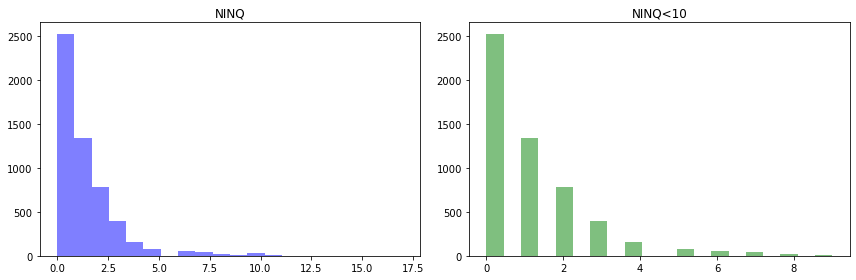

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(Base['NINQ'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('NINQ')
axes[1].hist(Base[Base['NINQ']<10]['NINQ'], bins=20, color='green', alpha=0.5)
axes[1].set_title('NINQ<10')
plt.tight_layout()
plt.show()

In [47]:
Imputar_NINQ=Base[Base['NINQ']<10]['NINQ'].mean()
print(Imputar_NINQ)
Base['NINQ'] =  np.where(Base['NINQ']>10,Imputar_NINQ,Base['NINQ'])
Base['NINQ'] = np.where(Base['NINQ'].isnull(), 5, Base['NINQ'])

1.108583055863855


In [48]:
Base['CLNO'].unique()

array([ 9., 14., 10., nan,  8., 17., 12., 13., 25., 24., 16., 22.,  0.,
        4., 21., 19., 45., 26., 37.,  3.,  2., 27., 20.,  7., 36., 33.,
        6., 28., 11., 31., 15., 18., 23.,  5., 30., 34., 42., 50., 47.,
       32., 29., 46., 38., 40., 49., 43., 35.,  1., 56., 39., 51., 55.,
       65., 57., 41., 71., 48., 53., 64., 52., 63., 44., 58.])

In [49]:
Base['MORTDUE'].describe()

count     5960.000000
mean     16265.703893
std       1653.534536
min       2063.000000
25%      16262.771937
50%      16262.771937
75%      16262.771937
max      25000.000000
Name: MORTDUE, dtype: float64

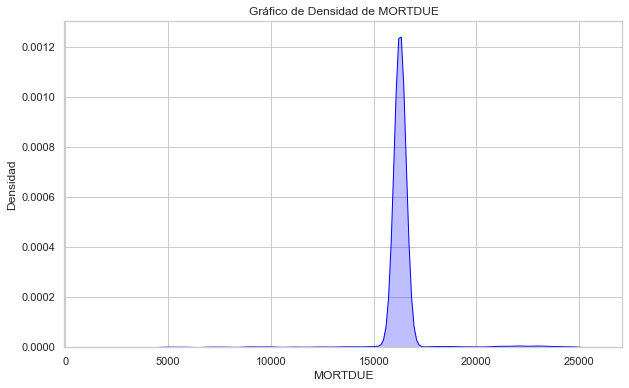

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(data=Base['MORTDUE'], fill=True, color="blue")

plt.title("Gráfico de Densidad de MORTDUE")
plt.xlabel("MORTDUE")
plt.ylabel("Densidad")

plt.show()

In [51]:
Base[Base['DEBTINC'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.000000,16262.771937,29800.0,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300.000000,16262.771937,29800.0,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500.000000,13500.000000,16700.0,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,9.362174,NaN,0.0,150.000000,5.0,NaN,NaN
4,0,1700.000000,16262.771937,29800.0,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,1,16935.114236,16262.771937,29800.0,DebtCon,Other,1.000000,0.0,0.0,117.166667,9.0,23.0,NaN
5932,1,16935.114236,16262.771937,29800.0,DebtCon,Other,12.000000,0.0,0.0,134.900000,0.0,26.0,NaN
5933,1,16935.114236,16262.771937,29800.0,HomeImp,Self,8.000000,1.0,2.0,71.533132,3.0,14.0,NaN
5935,0,16935.114236,13900.000000,29800.0,HomeImp,Other,27.000000,0.0,1.0,138.000000,0.0,14.0,NaN


In [52]:
print(Base[Base['DEBTINC'].isna()].shape)

(1267, 13)


In [53]:
bins = [0, 5000,10000,15000,20000,float('inf')] 
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k+']
Base['MORTDUE_Rango'] = pd.cut(Base['MORTDUE'], bins=bins, labels=labels, include_lowest=True)
media_debtinc_por_rango = Base.groupby('MORTDUE_Rango')['DEBTINC'].mean()

In [54]:
media_debtinc_por_rango

MORTDUE_Rango
0-5k       40.836453
5k-10k     26.971794
10k-15k    29.518648
15k-20k    34.010981
20k+       30.286589
Name: DEBTINC, dtype: float64

In [55]:
media_por_rango = {}
for rango in labels:
    media = Base[Base['MORTDUE_Rango'] == rango]['DEBTINC'].mean()
    media_por_rango[rango] = media
media_por_rango

{'0-5k': 40.836452556,
 '5k-10k': 26.971793721019594,
 '10k-15k': 29.518648409799997,
 '15k-20k': 34.0109811076626,
 '20k+': 30.286588966964054}

In [56]:
for rango, media in media_por_rango.items():
    Base.loc[(Base['DEBTINC'].isnull()) & (Base['MORTDUE_Rango'] == rango), 'DEBTINC'] = media

In [60]:
Base.DEROG.unique()

array([ 0., nan,  3.,  2.,  1.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

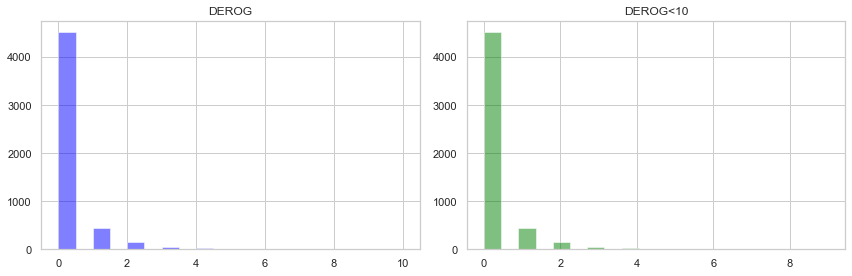

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(Base['DEROG'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('DEROG')
axes[1].hist(Base[Base['DEROG']<10]['DEROG'], bins=20, color='green', alpha=0.5)
axes[1].set_title('DEROG<10')
plt.tight_layout()
plt.show()

In [61]:
#Base['DEROG'] =  np.where(Base['NINQ']>10,Imputar_NINQ,Base['NINQ'])
Base['DEROG'] = np.where(Base['DEROG'].isnull(), 0, Base['DEROG'])

In [62]:
Base.isnull().sum()

BAD                0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO             222
DEBTINC            0
MORTDUE_Rango      0
dtype: int64

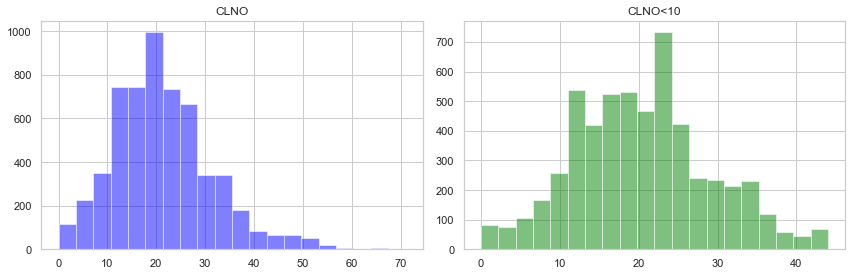

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(Base['CLNO'], bins=20, color='blue', alpha=0.5)
axes[0].set_title('CLNO')
axes[1].hist(Base[Base['CLNO']<45]['CLNO'], bins=20, color='green', alpha=0.5)
axes[1].set_title('CLNO<10')
plt.tight_layout()
plt.show()

In [64]:
Q1 = Base['CLNO'].describe()['25%']
Q3 = Base['CLNO'].describe()['75%']
IQR = Q3 - Q1

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango Intercuartílico (IQR):", IQR)

Q3+1.5*IQR,Q3-1.5*IQR

Primer cuartil (Q1): 15.0
Tercer cuartil (Q3): 26.0
Rango Intercuartílico (IQR): 11.0


(42.5, 9.5)

In [67]:
Imputar_CLNO=Base[Base['CLNO']<45]['CLNO'].mean()
print(Imputar_CLNO)
Base['CLNO'] =  np.where(Base['CLNO']>45,Imputar_CLNO,Base['CLNO'])
Base['CLNO'] = np.where(Base['CLNO'].isnull(), 5, Base['CLNO'])

20.296917252568957


In [68]:
Base.isnull().sum()

BAD              0
LOAN             0
MORTDUE          0
VALUE            0
REASON           0
JOB              0
YOJ              0
DEROG            0
DELINQ           0
CLAGE            0
NINQ             0
CLNO             0
DEBTINC          0
MORTDUE_Rango    0
dtype: int64

In [85]:
Base_F = pd.merge(Base, pd.get_dummies(Base[['JOB','REASON','MORTDUE_Rango']]), left_index=True, right_index=True)
Base_F

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_DebtCon,REASON_HomeImp,MORTDUE_Rango_0-5k,MORTDUE_Rango_5k-10k,MORTDUE_Rango_10k-15k,MORTDUE_Rango_15k-20k,MORTDUE_Rango_20k+
0,1,1100.000000,16262.771937,29800.0,HomeImp,Other,10.500000,0.0,0.0,94.366667,...,0,0,0,0,1,0,0,0,1,0
1,1,1300.000000,16262.771937,29800.0,HomeImp,Other,7.000000,0.0,2.0,121.833333,...,0,0,0,0,1,0,0,0,1,0
2,1,1500.000000,13500.000000,16700.0,HomeImp,Other,4.000000,0.0,0.0,149.466667,...,0,0,0,0,1,0,0,1,0,0
3,1,1500.000000,16262.771937,25000.0,DebtCon,Other,9.362174,0.0,0.0,150.000000,...,0,0,0,1,0,0,0,0,1,0
4,0,1700.000000,16262.771937,29800.0,HomeImp,Office,3.000000,0.0,0.0,93.333333,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,16935.114236,16262.771937,29800.0,DebtCon,Other,16.000000,0.0,0.0,221.808718,...,0,0,0,1,0,0,0,0,1,0
5956,0,16935.114236,16262.771937,29800.0,DebtCon,Other,16.000000,0.0,0.0,208.692070,...,0,0,0,1,0,0,0,0,1,0
5957,0,16935.114236,16262.771937,29800.0,DebtCon,Other,15.000000,0.0,0.0,212.279697,...,0,0,0,1,0,0,0,0,1,0
5958,0,16935.114236,16262.771937,29800.0,DebtCon,Other,14.000000,0.0,0.0,213.892709,...,0,0,0,1,0,0,0,0,1,0


In [86]:
Base_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   BAD                    5960 non-null   int64   
 1   LOAN                   5960 non-null   float64 
 2   MORTDUE                5960 non-null   float64 
 3   VALUE                  5960 non-null   float64 
 4   REASON                 5960 non-null   object  
 5   JOB                    5960 non-null   object  
 6   YOJ                    5960 non-null   float64 
 7   DEROG                  5960 non-null   float64 
 8   DELINQ                 5960 non-null   float64 
 9   CLAGE                  5960 non-null   float64 
 10  NINQ                   5960 non-null   float64 
 11  CLNO                   5960 non-null   float64 
 12  DEBTINC                5960 non-null   float64 
 13  MORTDUE_Rango          5960 non-null   category
 14  JOB_Mgr                5960 non-null   u

In [87]:
X=Base_F.drop(['BAD','REASON','JOB','MORTDUE_Rango'],axis=1)
y=Base_F[['BAD']]
print(X.shape,y.shape)

(5960, 23) (5960, 1)


In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

print("Intercepto:", model.intercept_[0])
import warnings
print("Coeficientes:", model.coef_[0])

Intercepto: 0.0009566097258696862
Coeficientes: [-3.31821353e-05  1.03706040e-04 -1.32877420e-04 -1.43514585e-03
  3.37101608e-02  6.06117003e-02 -5.37247847e-03  2.75711511e-02
 -2.02067496e-03  6.48620210e-02  1.91867076e-03 -4.35453126e-03
  2.07350184e-03 -1.13247910e-03  1.03123324e-03  1.42021425e-03
 -8.01551234e-04  1.75816096e-03  4.51066736e-04  9.06303611e-04
  5.14261762e-04 -5.45400598e-04 -3.69621785e-04]


/Users/jorgefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [90]:
import warnings
warnings.filterwarnings("ignore")

def bootstrap_confidence_interval_logistic(X, y, num_simulations=10000):
    coefs = []
    num_samples = len(X)
    for _ in range(num_simulations):
        # Muestreo bootstrap
        idx = np.random.choice(range(num_samples), size=num_samples, replace=True)
        X_sampled, y_sampled = X.iloc[idx], y.iloc[idx]
        
        # Ajustar el modelo en la muestra
        model.fit(X_sampled, y_sampled)
        coefs.append(model.coef_[0])
    
    coefs = np.array(coefs)
    lower_percentile = np.percentile(coefs, 2.5, axis=0)
    upper_percentile = np.percentile(coefs, 97.5, axis=0)
    
    return lower_percentile, upper_percentile

# Obtener intervalos de confianza de los coeficientes
lower_ci, upper_ci = bootstrap_confidence_interval_logistic(X, y)

print("Intervalos de confianza de los coeficientes:")
print("Intervalo Inferior:", lower_ci)
print("Intervalo Superior:", upper_ci)

Intervalos de confianza de los coeficientes:
Intervalo Inferior: [-4.36411928e-05  5.02451990e-05 -1.79516504e-04 -1.97396258e-02
  1.54275639e-02  2.79622132e-02 -6.74291519e-03  1.28515057e-02
 -2.06657266e-02  3.83818022e-02  1.65021594e-04 -1.37462428e-01
 -5.78469416e-03 -2.24853280e-02  4.25109540e-04  5.99350768e-04
 -5.07216436e-02  1.25986666e-04  1.72332136e-04  3.46457002e-04
  5.74702506e-05 -3.92371045e-02 -1.26302703e-02]
Intervalo Superior: [-2.23883527e-05  1.57489802e-04 -9.96318825e-05  1.44792982e-02
  5.52015919e-01  7.86299813e-01 -4.46796242e-03  1.42340516e-01
  1.66402290e-02  8.87671034e-02  5.03792584e-02 -1.92496677e-03
  5.63000464e-02  2.74256975e-02  4.55236665e-02  4.99586612e-02
  6.75559696e-03  7.12842026e-02  1.49429116e-02  3.41008039e-02
  1.76157434e-02  1.84540484e-03  8.96261256e-03]


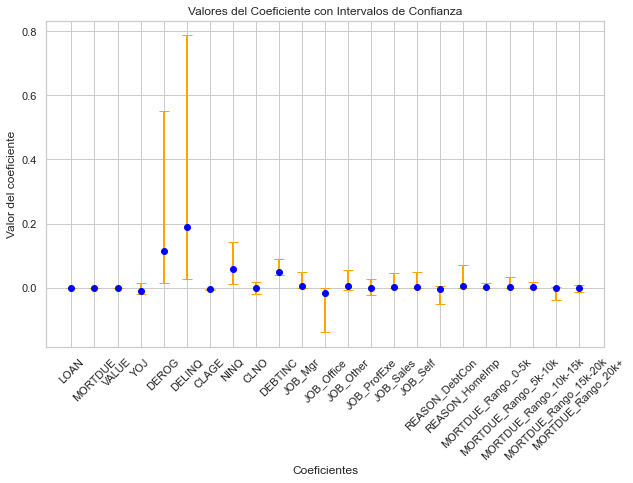

In [94]:
coeficientes = model.coef_[0]
nombres_coeficientes=X.columns
plt.figure(figsize=(10, 6))

plt.errorbar(nombres_coeficientes, coeficientes, yerr=[coeficientes - lower_ci, upper_ci - coeficientes],
             fmt='o', color='blue', ecolor='orange', capsize=5, elinewidth=2)

plt.xlabel('Coeficientes')
plt.ylabel('Valor del coeficiente')
plt.title('Valores del Coeficiente con Intervalos de Confianza')

plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x para una mejor visualización

plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

model = smf.ols('y ~ X', data=X.columns).fit()  # Ejemplo para regresión lineal

# O suponiendo que has ajustado el modelo directamente con sm (sm.OLS o sm.Logit)
model = sm.OLS(y, X).fit()  # Ejemplo para regresión lineal

# Obtener el resumen del modelo
summary = model.summary()

# Obtener los coeficientes y sus intervalos de confianza del resumen del modelo
conf_int = summary.tables[1]  # Obtener la segunda tabla del resumen que contiene los coeficientes e intervalos de confianza
conf_int = pd.DataFrame(conf_int.data[1:], columns=conf_int.data[0])  # Convertir la tabla en un DataFrame

print(conf_int)
